# zadanie 8

---

#### wczytanie danych 

In [107]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [108]:
df = pd.read_csv('./punkty.csv', names=['X', 'y'])
df.describe()

,X,y
count,104.000000,104.000000
mean,-1.078891,25.240878
std,1.820460,67.221188
min,-4.146800,-57.820100
25%,-2.764975,-7.240225
50%,-1.061250,4.968200
75%,0.412375,17.677475
max,2.137400,260.547500


In [109]:
N = 104
df

,X,y
0,2.0612,243.1848
1,-3.5585,-14.1131
2,-4.1468,-57.8201
3,0.4057,17.2907
4,-0.8329,-10.9497
...,...,...
99,1.0271,69.9321
100,0.8664,53.0862
101,-2.0158,4.6816
102,-0.6703,-10.6892


In [110]:
df = df.sort_values(by='X')
df

,X,y
2,-4.1468,-57.8201
8,-4.1100,-54.9286
91,-4.0975,-53.2809
79,-4.0918,-52.8361
45,-3.8730,-34.4177
...,...,...
36,1.9295,214.0208
0,2.0612,243.1848
46,2.0753,246.2476
53,2.0892,249.6520


In [111]:
# df -> np 
X = df['X'].to_numpy(dtype=np.float128)
y = df['y'].to_numpy(dtype=np.float128)
X[:10], y[:10]

(array([-4.1468, -4.11  , -4.0975, -4.0918, -3.873 , -3.7904, -3.7531,
        -3.6598, -3.612 , -3.588 ], dtype=float128),
 array([-57.8201, -54.9286, -53.2809, -52.8361, -34.4177, -28.4065,
        -25.6811, -19.9942, -17.1681, -15.7925], dtype=float128))

In [112]:
def f(x: np.float128) -> np.float128: 
    return 6.02 * (x + 3.2) * (x - 0.02) * (x + 1.7)

##### (a) narysuj wykres funkcji f i zbiór X 

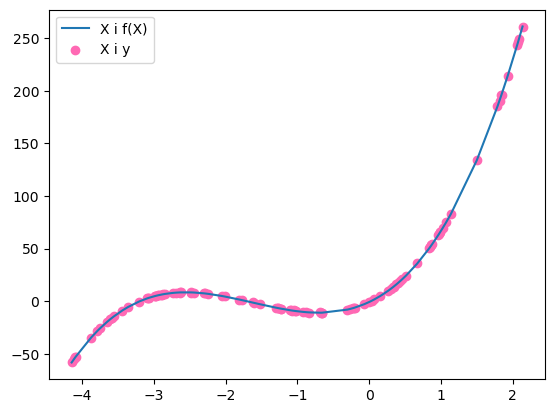

In [113]:
plt.plot(X, f(X), label='X i f(X)')
plt.scatter(X, y, color='hotpink', label='X i y')
plt.legend()
plt.show()

#### (b) interpolacja

In [114]:
iloraz_roznicowy = np.zeros((N, N))

# liczenie ilorazów różnicowych 
for i in range(N):
    iloraz_roznicowy[i, 0] = y[i]

for j in range(1, N):
    for i in range(N - j):
        iloraz_roznicowy[i, j] = (iloraz_roznicowy[i + 1, j - 1] - iloraz_roznicowy[i, j - 1]) / (X[i + j] - X[i])

In [115]:
def oblicz_wielomain_w_punkcie(x: np.float128) -> np.float128:
    L = np.zeros(N).astype(np.float128)
    L[0] = iloraz_roznicowy[0, 0]

    product = np.float128(1)
    for i in range(1, N):
        product *= (x - X[i - 1])
        L[i] = L[i - 1] + iloraz_roznicowy[0, i] * product
    return L[N - 1]

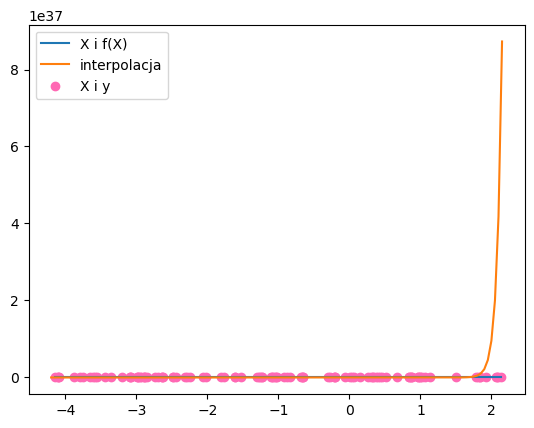

In [116]:
X_plot = np.arange(-4.2, 2.2, 0.05)
y_plot = [oblicz_wielomain_w_punkcie(x) for x in X_plot]

plt.plot(X, f(X), label='X i f(X)')
plt.plot(X_plot, y_plot, label='interpolacja')
plt.scatter(X, y, color='hotpink', label='X i y')
plt.legend()
plt.show()

In [117]:
oblicz_wielomain_w_punkcie(-2) # to sie nie uda, mamy za dużo punktów do interpolacji

-27625874.326969044307

#### (c) licznie w*_n

In [121]:
def oblicz_wielomian_ortogonalny(n: int) -> np.ndarray: 
    P = np.zeros((n + 1, N))
    
    def c(k):
        licznik = np.dot(X * P[k - 1, :], P[k - 1, :]) 
        mianownik = np.dot(P[k - 1, :], P[k - 1, :])
        return licznik / mianownik
    
    def d(k):
        licznik = np.dot(P[k - 1, :], P[k - 1, :])
        mianownik = np.dot(P[k - 2, :], P[k - 2, :]) 
        return licznik / mianownik
    
    # liczenie ciągu wielomianów ortogonalnych 
    P[0, :] = 1.
    P[1] = X - c(1)
    for k in range(2, n + 1):
        P[k] = (X - c(k)) * P[k - 1] - d(k) * P[k - 2]
    
    return P

def oblicz_wielomian_optymalny(P: np.ndarray, n: int) -> np.ndarray:
    # obliczanie współczynników a_k
    a = np.zeros(n + 1, dtype=np.float128)
    for k in range(n + 1):
        licznik = np.dot(y, P[k, :])
        mianownik = np.dot(P[k, :], P[k, :])
        a[k] = licznik / mianownik
    
    # tworzenie w_n
    w = np.sum(a[:, np.newaxis] * P, axis=0)
    return w

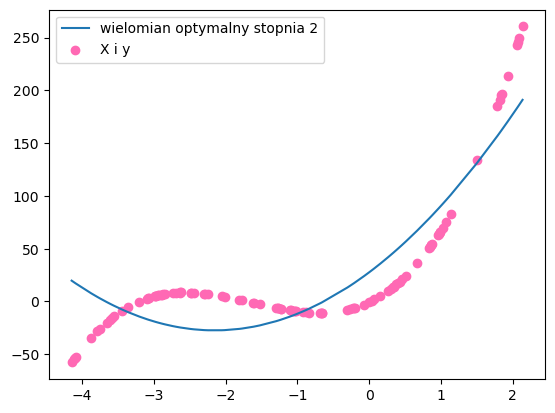

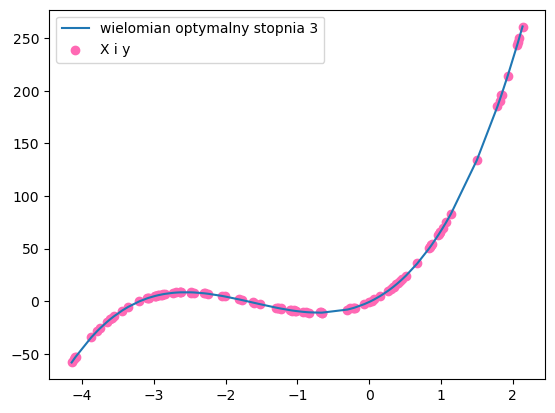

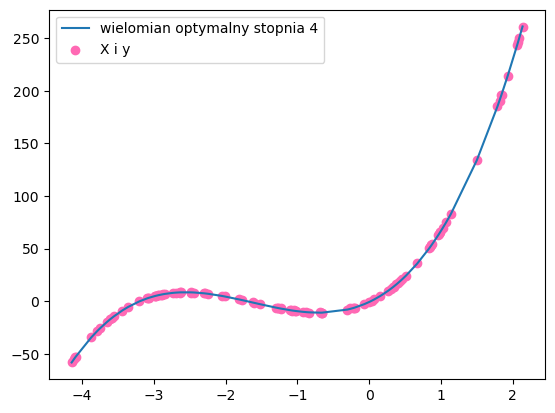

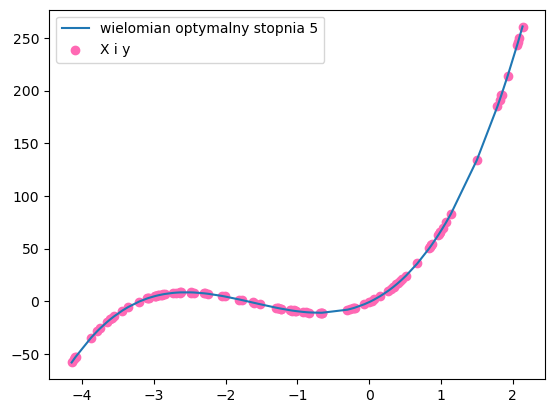

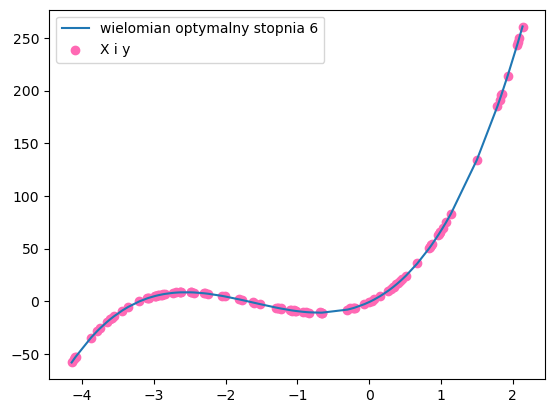

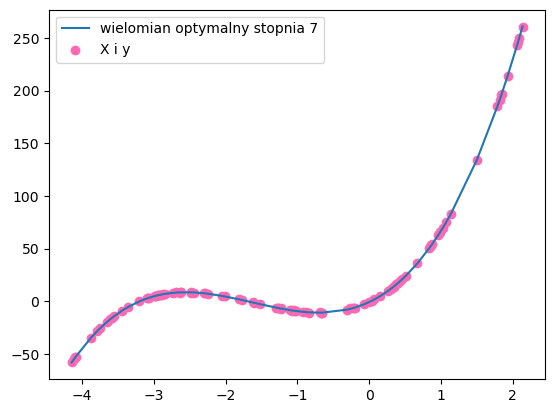

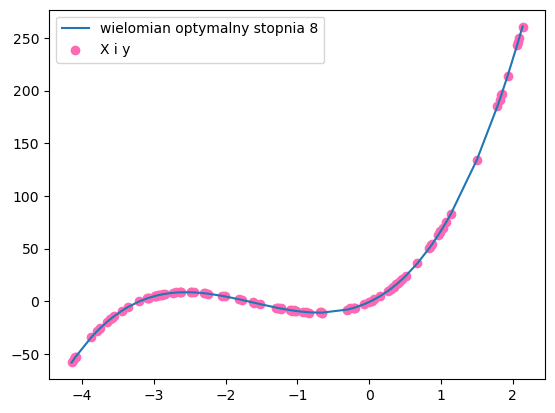

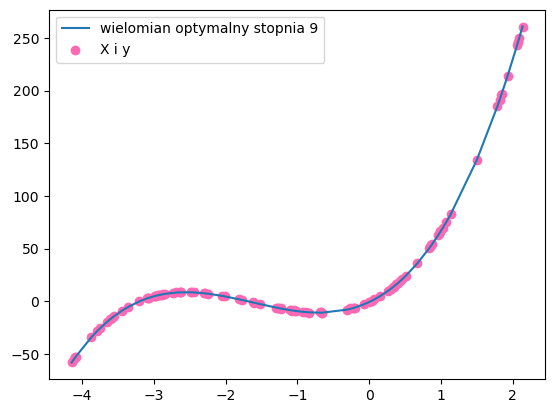

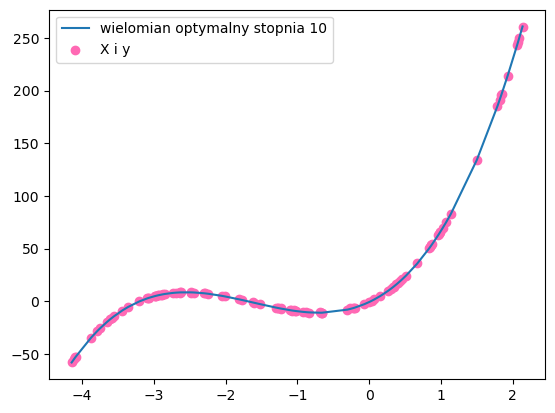

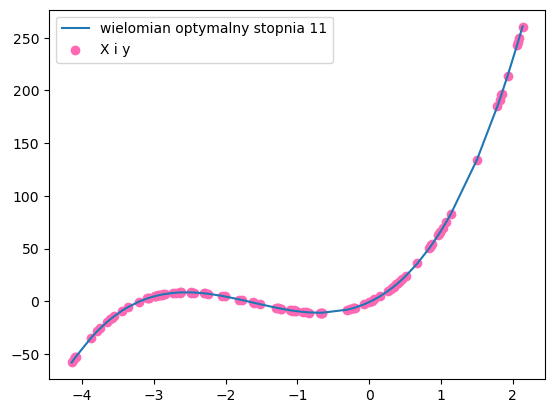

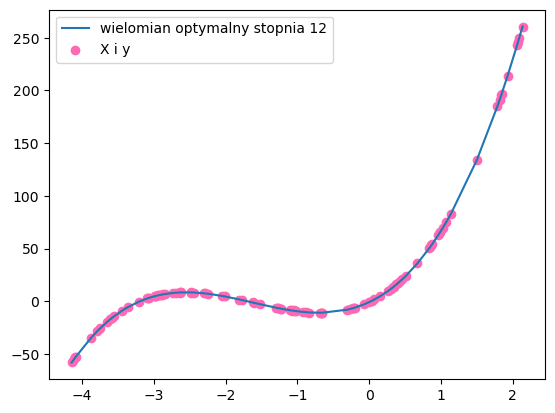

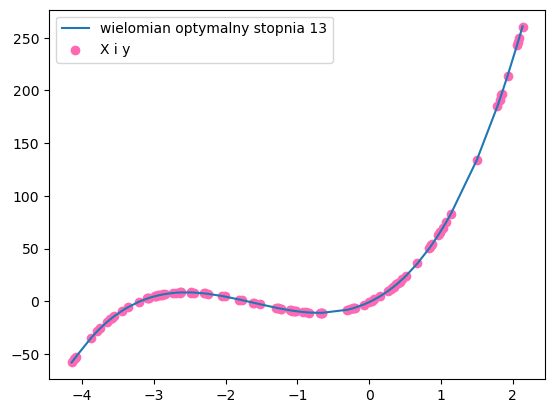

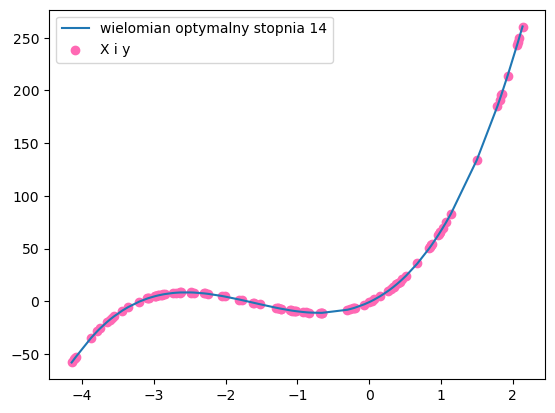

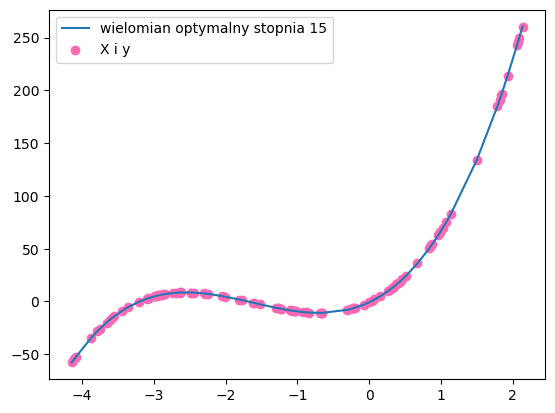

In [124]:
for n in range(2, 16):
    P = oblicz_wielomian_ortogonalny(n)
    w = oblicz_wielomian_optymalny(P, n)
    
    plt.plot(X, w, label=f'wielomian optymalny stopnia {n}')
    plt.scatter(X, y, color='hotpink', label='X i y')
    plt.legend()
    plt.show()
    